In [1]:
import io 
import re # importing regex module 
import os

import numpy as np
import math
import itertools
from functools import reduce

import pandas as pd
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime

from datetime import datetime as dt

import networkx as nx

import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.lines as mlines
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import proj3d 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
import matplotlib.cm as cm
from matplotlib.ticker import PercentFormatter

import tensorflow as tf  
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import concatenate

import seaborn as sns

from turtle import color

from pylab import rcParams
np.set_printoptions(threshold=np.inf)

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load Data:
#Consolidated_Data_Sheet
Consol_Data_Sheet = pd.read_csv('SC_DF_consol_IO_Var.csv',index_col=('Work Order ID'),encoding='ISO-8859-1',na_filter=True, low_memory=False)
#Specify dtype option on import or set low_memory=False.
df=Consol_Data_Sheet
df.fillna(value="", inplace=True)

In [3]:
df1=df[['Service Request ID','Customer Company','Contact Company','Notes_Work Detail','Notes_Data_Sht','Client Sensitivity','VIP','Priority','Submit Date_Work_Detail_Sht','Request Manager - Support Group','Work Order Type','Submitter_Work_Detail_Sht','Template','Operational Tier 1','Operational Tier 2','Operational Tier 3','Product Tier 1','Product Tier 2','Product Tier 3','Actual Start','Request Assignee - Support Group','SLA Response - Hours','SLA Resolve - Hours','OLA Response - Hours','OLA Resolve - Hours','Actual End','Open Age Days','Completed Age Days']]

# list of dtypes to include 
include =['object', 'float', 'int', 'datetime'] 
# calling describe method 
desc = df1.describe(percentiles = None, include = include)
# display 
desc.fillna(value="", inplace=True)
desc.applymap(lambda x: "" if "###" in str(x) else x)

df1['Work_Order_Type']=df1['Operational Tier 3'] + ':' + df1['Product Tier 2']

df2=df1[['Service Request ID','Work Order Type','Customer Company','Notes_Work Detail','Priority','Request Manager - Support Group','Template','Work_Order_Type','Actual Start','Submit Date_Work_Detail_Sht','Submitter_Work_Detail_Sht','Actual End','SLA Response - Hours','SLA Resolve - Hours','OLA Response - Hours','OLA Resolve - Hours','Open Age Days']]

df2.rename(columns={'Actual Start':'Actual_Start','Actual End':'Actual_End','Request Manager - Support Group':'Support_Group','Submit Date_Work_Detail_Sht': 'Submit_Date','Submitter_Work_Detail_Sht':'Submitter','Notes_Work Detail': 'Notes'}, inplace=True)

df2.fillna(value="", inplace=True)

df3=df2.reset_index()

df4=df3.set_index('Support_Group')

df5 = df4[['Work_Order_Type','Work Order ID','Submitter','Priority','Submit_Date','Actual_Start','Actual_End' ]]

df5

,Work_Order_Type,Work Order ID,Submitter,Priority,Submit_Date,Actual_Start,Actual_End
Support_Group,,,,,,,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,Remedy Application Service,Low,2018-05-28 13:45:00,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,ven-10471a,Low,2018-05-28 13:45:00,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,malebatf1,Low,2018-07-11 11:40:00,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,malebatf1,Low,2018-07-11 11:40:00,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,malebatf1,Low,2018-07-11 11:48:00,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,malebatf1,Low,2018-07-11 11:49:00,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,malebatf1,Low,2018-07-11 11:49:00,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,hlatshan1,Low,2018-07-17 10:52:00,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,hlatshan1,Low,2018-07-17 10:52:00,2018-07-11 11:40:00,


In [4]:
df5['Actual_End']=pd.to_datetime(df5['Actual_End'], errors='coerce')
nulls=df5['Actual_End'].notnull()==False

df5['Actual_Start']=pd.to_datetime(df5['Actual_Start'], errors='coerce')
nulls=df5['Actual_Start'].notnull()==False

df5.fillna(value="", inplace=True)

df5['Actual_Start'].replace('', np.nan, inplace=True)
df5.dropna(subset=['Actual_Start'], inplace=True)

df5['Actual_End'].replace('', np.nan, inplace=True)
df5.dropna(subset=['Actual_End'], inplace=True)

df5

,Work_Order_Type,Work Order ID,Submitter,Priority,Submit_Date,Actual_Start,Actual_End
Support_Group,,,,,,,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,Remedy Application Service,Low,2018-05-30 13:10:00,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,ven-10471a,Low,2018-05-30 13:11:00,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,malebatf1,Low,2018-07-11 11:50:00,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,malebatf1,Low,2018-07-11 11:54:00,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,malebatf1,Low,2018-12-11 09:30:00,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,malebatf1,Low,2018-12-13 14:13:00,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,malebatf1,Low,2018-12-13 14:13:00,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,malebatf1,Low,2018-12-13 14:13:00,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,boshiesm1,Low,2018-12-18 10:56:00,2018-07-11 11:50:00,2019-08-22 10:43:00


In [5]:
df5['WO_sec']= (df5.loc[:,'Actual_End'] - df5.loc[:,'Actual_Start']).astype('timedelta64[s]')

In [6]:
df5['WO_hrs']=df5['WO_sec']/3600

In [7]:
df5[['WO_sec','WO_hrs']]

,WO_sec,WO_hrs
Support_Group,,
SAE: Retail Engineering Admin,35160780.0,9766.883333
SAE: Retail Engineering Admin,35160780.0,9766.883333
SAE: Retail Engineering Admin,35160780.0,9766.883333
SAE: Retail Engineering Admin,35160780.0,9766.883333
SAE: Retail Engineering Admin,35160780.0,9766.883333
SAE: Retail Engineering Admin,35160780.0,9766.883333
SAE: Retail Engineering Admin,35160780.0,9766.883333
SAE: Retail Engineering Admin,35160780.0,9766.883333
SAE: Retail Engineering Admin,35160780.0,9766.883333


In [8]:
df6=df5.reset_index()

In [9]:
df6.groupby(['Support_Group','Work_Order_Type','Work Order ID','Priority',],as_index=False)['WO_hrs'].sum()

,Support_Group,Work_Order_Type,Work Order ID,Priority,WO_hrs
0,AS: Bank & Cash,Bank Rejection:FEDI Failure,WO0000001512772,Low,1884.483333
1,AS: Bank & Cash,Bank Rejection:FEDI Failure,WO0000001512812,Low,25383.150000
2,AS: Bank & Cash,Bank Rejection:FEDI Failure,WO0000001515330,,671.250000
3,AS: Bank & Cash,Bank Rejection:FEDI Failure,WO0000001517641,Low,0.600000
4,AS: Bank & Cash,Bank Rejection:FEDI Failure,WO0000001519521,Low,0.000000
5,AS: Bank & Cash,Bank Rejection:FEDI Failure,WO0000001520317,Low,0.000000
6,AS: Bank & Cash,Bank Rejection:FEDI Failure,WO0000001520329,Low,0.000000
7,AS: Bank & Cash,Bank Rejection:FEDI Failure,WO0000001520342,Low,387.650000
8,AS: Bank & Cash,Bank Rejection:FEDI Failure,WO0000001520373,Low,0.050000
9,AS: Bank & Cash,Bank Rejection:FEDI Failure,WO0000001520375,Low,0.000000


In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Suprt_Grp = df6.loc[:,'Support_Group'] 
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Suprt_Grp_LE_TRNS = le.fit_transform(Suprt_Grp)
df6.loc[:,'Suprt_Grp_LE_TRNS'] =pd.Series(Suprt_Grp_LE_TRNS)
#Inverse Transform
Suprt_Grp_LE_INV_TRNS = le.inverse_transform(df6.loc[:,'Suprt_Grp_LE_TRNS'])
df6.loc[:,'Suprt_Grp_LE_INV_TRNS']=pd.Series(Suprt_Grp_LE_INV_TRNS)

WO_T = df6['Work_Order_Type'] 
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
WO_T_LE_TRNS = le.fit_transform(WO_T)
df6['WO_T_LE_TRNS'] =pd.Series(WO_T_LE_TRNS)
#Inverse Transform
WO_T_LE_INV_TRNS = le.inverse_transform(df6['WO_T_LE_TRNS'])
df6['WO_T_LE_INV_TRNS']=pd.Series(WO_T_LE_INV_TRNS)

WO_ID = df6['Work Order ID'] 
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
WO_ID_LE_TRNS = le.fit_transform(WO_ID)
df6['WO_ID_LE_TRNS'] =pd.Series(WO_ID_LE_TRNS)
#Inverse Transform
WO_ID_LE_INV_TRNS = le.inverse_transform(df6['WO_ID_LE_TRNS'])
df6['WO_ID_LE_INV_TRNS']=pd.Series(WO_ID_LE_INV_TRNS)


df_WOh=df6.loc[:, 'WO_hrs'].apply(pd.to_numeric)
df6['Area'] = (np.log(df_WOh))**4
Area = df6['Area']
ind3 = np.unique(Area, return_inverse=True)


In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Suprt_Grp = df6.loc[:,'Support_Group'] 
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Suprt_Grp_LE_TRNS = le.fit_transform(Suprt_Grp)
SgCl=le.classes_
SgCl


array(['AS: Bank & Cash', 'AS: Sasolburg Transport Q&R',
       'BC: Outbound Material Management',
       'BP: Group Functions: Sasolburg',
       'BP: Secunda - Satellite Ops: Sasol Gas Germiston/Mozambique',
       'BP: Synfuels', 'BP: Synfuels - Gas Production',
       'BP: Synfuels - Refining & SCC',
       'CRM: Customer Relations Management', 'Contact Centre Tier 1',
       'Contact Centre Tier 2', 'ESD: Enterprise Development',
       'GARR Team', 'HR Contact Centre Tier 2', 'HR Information Centre',
       'MM: Refu Central Office', 'MP: Sasolburg - MRP',
       'MP: Secunda - MRP', 'Remedy Support',
       'SAE: Commercial Engineering Admin',
       'SAE: Retail Engineering Admin', 'SE - Secunda', 'SE Assessments',
       'SM: SIM Support', 'SP: Transactional Auditing'], dtype=object)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

WOT = df6.loc[:,'Work_Order_Type'] 
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
W_O_T_LE_TRNS = le.fit_transform(WOT)
W_O_T=le.classes_
W_O_T


array(['2.1 Choice Option:Explanation of Options',
       '2.1 Choice Option:Own Policy', '2.1 Choice Option:Pension Fund',
       '2.1 Choice Option:Sasol Insurance Policy',
       '2007 duplicate:email 2008 duplicate',
       '2008 IRP5:Email / Provide Information',
       '2009 duplicate:Email / Provide Information',
       '2010 IRP5:Email / Provide Information',
       '2011 duplicate:Email / Provide Information',
       '2012 IRP5:Email / Provide Information',
       '2013 IRP5:Duplicate of 2013 IRP5',
       '2014 IRP5:Code Explanation Provided',
       '2014 IRP5:Duplicate of 2014 IRP5',
       '2014 IRP5:General IRP5 Explanation',
       '2015 IRP5:Duplicate of 2015 IRP5',
       '2016 IRP5:Duplicate of 2016 IRP5',
       '2017 IRP5:Duplicate of 2017 IRP5',
       '2017 IRP5:Email / Provide Information',
       '2018 IRP5:Code Explanation Provided',
       '2018 IRP5:Duplicate of 2018 IRP5',
       '2018 IRP5:Email / Provide Information',
       '2018 IRP5:General IRP5 Explana

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

WID = df6.loc[:,'Work Order ID'] 
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
W_O_ID_LE_TRNS = le.fit_transform(WID)
W_O_ID=le.classes_
W_O_ID


array(['WO0000001200677', 'WO0000001204567', 'WO0000001232904',
       'WO0000001232909', 'WO0000001259352', 'WO0000001259372',
       'WO0000001259413', 'WO0000001284473', 'WO0000001284474',
       'WO0000001284506', 'WO0000001284530', 'WO0000001293495',
       'WO0000001302563', 'WO0000001302569', 'WO0000001302576',
       'WO0000001302579', 'WO0000001302597', 'WO0000001302610',
       'WO0000001303777', 'WO0000001303783', 'WO0000001309513',
       'WO0000001309520', 'WO0000001316924', 'WO0000001317301',
       'WO0000001317309', 'WO0000001318734', 'WO0000001350179',
       'WO0000001350182', 'WO0000001350187', 'WO0000001350188',
       'WO0000001350190', 'WO0000001350195', 'WO0000001350199',
       'WO0000001350202', 'WO0000001350208', 'WO0000001350226',
       'WO0000001354619', 'WO0000001355881', 'WO0000001361811',
       'WO0000001362019', 'WO0000001365059', 'WO0000001375229',
       'WO0000001376365', 'WO0000001382394', 'WO0000001382396',
       'WO0000001382403', 'WO00000013824

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df6['Work Order ID'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'WO0000001200677': 0, 'WO0000001204567': 1, 'WO0000001232904': 2, 'WO0000001232909': 3, 'WO0000001259352': 4, 'WO0000001259372': 5, 'WO0000001259413': 6, 'WO0000001284473': 7, 'WO0000001284474': 8, 'WO0000001284506': 9, 'WO0000001284530': 10, 'WO0000001293495': 11, 'WO0000001302563': 12, 'WO0000001302569': 13, 'WO0000001302576': 14, 'WO0000001302579': 15, 'WO0000001302597': 16, 'WO0000001302610': 17, 'WO0000001303777': 18, 'WO0000001303783': 19, 'WO0000001309513': 20, 'WO0000001309520': 21, 'WO0000001316924': 22, 'WO0000001317301': 23, 'WO0000001317309': 24, 'WO0000001318734': 25, 'WO0000001350179': 26, 'WO0000001350182': 27, 'WO0000001350187': 28, 'WO0000001350188': 29, 'WO0000001350190': 30, 'WO0000001350195': 31, 'WO0000001350199': 32, 'WO0000001350202': 33, 'WO0000001350208': 34, 'WO0000001350226': 35, 'WO0000001354619': 36, 'WO0000001355881': 37, 'WO0000001361811': 38, 'WO0000001362019': 39, 'WO0000001365059': 40, 'WO0000001375229': 41, 'WO0000001376365': 42, 'WO0000001382394': 4

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df6['Work Order ID'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'WO0000001200677': 0, 'WO0000001204567': 1, 'WO0000001232904': 2, 'WO0000001232909': 3, 'WO0000001259352': 4, 'WO0000001259372': 5, 'WO0000001259413': 6, 'WO0000001284473': 7, 'WO0000001284474': 8, 'WO0000001284506': 9, 'WO0000001284530': 10, 'WO0000001293495': 11, 'WO0000001302563': 12, 'WO0000001302569': 13, 'WO0000001302576': 14, 'WO0000001302579': 15, 'WO0000001302597': 16, 'WO0000001302610': 17, 'WO0000001303777': 18, 'WO0000001303783': 19, 'WO0000001309513': 20, 'WO0000001309520': 21, 'WO0000001316924': 22, 'WO0000001317301': 23, 'WO0000001317309': 24, 'WO0000001318734': 25, 'WO0000001350179': 26, 'WO0000001350182': 27, 'WO0000001350187': 28, 'WO0000001350188': 29, 'WO0000001350190': 30, 'WO0000001350195': 31, 'WO0000001350199': 32, 'WO0000001350202': 33, 'WO0000001350208': 34, 'WO0000001350226': 35, 'WO0000001354619': 36, 'WO0000001355881': 37, 'WO0000001361811': 38, 'WO0000001362019': 39, 'WO0000001365059': 40, 'WO0000001375229': 41, 'WO0000001376365': 42, 'WO0000001382394': 4

In [16]:
df7=df6.groupby(['Support_Group','Suprt_Grp_LE_TRNS','Work_Order_Type','WO_T_LE_TRNS','Work Order ID','WO_ID_LE_TRNS','Priority','WO_hrs'],as_index=True)['Area'].sum()
df8=pd.DataFrame(df7)

In [17]:
df8.replace([np.inf, -np.inf], np.nan).dropna(axis=1) #convert inf to nan and then drop nan
df8

Area
Support_Group              Suprt_Grp_LE_TRNS Work_Order_Type                                    WO_T_LE_TRNS Work Order ID   WO_ID_LE_TRNS Priority WO_hrs                  
AS: Bank & Cash            0                 Bank Rejection:FEDI Failure                        72           WO0000001512772 305           Low      171.316667  7.698964e+03
                                                                                                             WO0000001512812 306           Low      650.850000  6.869154e+04
                                                                                                             WO0000001515330 432                    134.250000  2.881703e+03
                                                                                                             WO0000001517641 1376          Low      0.200000    2.012881e+01
                                                                                                             WO0000001519521 2972          Low      0.000000             inf
                                                                                                             WO0000001520317 3711          Low      0.000000             inf
                                                                                                             WO0000001520329 3723          Low      0.000000             inf
                                                                                                             WO0000001520342 3736          Low      129.216667  1.675711e+03
                                                                                                             WO0000001520373 3763          Low      0.016667    8.430606e+02
                                                                                                             WO0000001520375 3765          Low      0.000000             inf
                                                                                                             WO0000001520378 3768          Low      0.016667    8.430606e+02
                                                                                                             WO0000001521592 4842          Low      0.016667    8.430606e+02
                                                                                                             WO0000001521872 5103          Low      0.016667    8.430606e+02
                                                                                                             WO0000001523159 6154          Low      0.000000             inf
                                                                                                             WO0000001523686 6634          Low      0.016667    8.430606e+02
                                                                                                             WO0000001533110 14686         Low      0.483333    1.676507e+00
                                                                                                             WO0000001533167 14732         Low      0.033333    6.691097e+02
                                             Bank Rejection:Trade Vendor: Invalid Banking De... 73           WO0000001521432 4697          Low      0.000000             inf
                                                                                                             WO0000001524320 7143          Low      0.000000             inf
                                                                                                             WO0000001527973 10334         Low      25.950000   1.348995e+03
                                                                                                             WO0000001529325 11581         Low      0.016667    1.405101e+03
                                                                                                             WO0000001529358 11613         Low      0.000000             inf
                

In [18]:
df9=df1[['Work_Order_Type','Customer Company','Notes_Work Detail','Priority','Request Manager - Support Group','Actual Start','Submit Date_Work_Detail_Sht','Submitter_Work_Detail_Sht','Actual End','SLA Response - Hours','SLA Resolve - Hours','OLA Response - Hours','OLA Resolve - Hours','Open Age Days']]

df9.rename(columns={'Customer Company':'Customer','Actual Start':'Actual_Start','Actual End':'Actual_End','Request Manager - Support Group':'Support_Group','Submit Date_Work_Detail_Sht': 'Submit_Date','Submitter_Work_Detail_Sht':'Submitter','Notes_Work Detail': 'Notes'}, inplace=True)

df9.fillna(value="", inplace=True)

df10=df9.reset_index()

df11=df10.set_index('Support_Group')

df12 = df11[['Work_Order_Type','Work Order ID','Customer','Submitter','Priority','Submit_Date','Notes','Actual_Start','Actual_End' ]]

df12

,Work_Order_Type,Work Order ID,Customer,Submitter,Priority,Submit_Date,Notes,Actual_Start,Actual_End
Support_Group,,,,,,,,,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,GERALD SMITH ELECTRICAL CC,Remedy Application Service,Low,2018-05-28 13:45:00,SASOL WITKOPPEN,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,GERALD SMITH ELECTRICAL CC,ven-10471a,Low,2018-05-28 13:45:00,SASOL WITKOPPEN,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,GERALD SMITH ELECTRICAL CC,malebatf1,Low,2018-07-11 11:40:00,SASOL WITKOPPEN,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,GERALD SMITH ELECTRICAL CC,malebatf1,Low,2018-07-11 11:40:00,SASOL WITKOPPEN,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,GERALD SMITH ELECTRICAL CC,malebatf1,Low,2018-07-11 11:48:00,SASOL WITKOPPEN,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,GERALD SMITH ELECTRICAL CC,malebatf1,Low,2018-07-11 11:49:00,SASOL WITKOPPEN,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,GERALD SMITH ELECTRICAL CC,malebatf1,Low,2018-07-11 11:49:00,SASOL WITKOPPEN,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,GERALD SMITH ELECTRICAL CC,hlatshan1,Low,2018-07-17 10:52:00,SASOL WITKOPPEN,2018-07-11 11:40:00,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001198282,GERALD SMITH ELECTRICAL CC,hlatshan1,Low,2018-07-17 10:52:00,SASOL WITKOPPEN,2018-07-11 11:40:00,


In [19]:
df12['Actual_End']=pd.to_datetime(df12['Actual_End'], errors='coerce')
nulls=df12['Actual_End'].notnull()==False

df12['Actual_Start']=pd.to_datetime(df12['Actual_Start'], errors='coerce')
nulls=df12['Actual_Start'].notnull()==False

df12.fillna(value="", inplace=True)

df12['Actual_Start'].replace('', np.nan, inplace=True)
df12.dropna(subset=['Actual_Start'], inplace=True)

df12['Actual_End'].replace('', np.nan, inplace=True)
df12.dropna(subset=['Actual_End'], inplace=True)

df12

,Work_Order_Type,Work Order ID,Customer,Submitter,Priority,Submit_Date,Notes,Actual_Start,Actual_End
Support_Group,,,,,,,,,
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,GERALD SMITH ELECTRICAL CC,Remedy Application Service,Low,2018-05-30 13:10:00,SASOL REITZ,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,GERALD SMITH ELECTRICAL CC,ven-10471a,Low,2018-05-30 13:11:00,SASOL REITZ,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,GERALD SMITH ELECTRICAL CC,malebatf1,Low,2018-07-11 11:50:00,SASOL REITZ,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,GERALD SMITH ELECTRICAL CC,malebatf1,Low,2018-07-11 11:54:00,SASOL REITZ,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,GERALD SMITH ELECTRICAL CC,malebatf1,Low,2018-12-11 09:30:00,SASOL REITZ,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,GERALD SMITH ELECTRICAL CC,malebatf1,Low,2018-12-13 14:13:00,SASOL REITZ,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,GERALD SMITH ELECTRICAL CC,malebatf1,Low,2018-12-13 14:13:00,SASOL REITZ,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,GERALD SMITH ELECTRICAL CC,malebatf1,Low,2018-12-13 14:13:00,SASOL REITZ,2018-07-11 11:50:00,2019-08-22 10:43:00
SAE: Retail Engineering Admin,Maintenance - Unplanned:None,WO0000001200677,GERALD SMITH ELECTRICAL CC,boshiesm1,Low,2018-12-18 10:56:00,SASOL REITZ,2018-07-11 11:50:00,2019-08-22 10:43:00


In [20]:
df12['WO_sec']= (df12.loc[:,'Actual_End'] - df12.loc[:,'Actual_Start']).astype('timedelta64[s]')
df12['WO_hrs']=df12['WO_sec']/3600
df14=df12.reset_index()
df14.groupby(['Support_Group','Work_Order_Type','Customer','Submitter','Work Order ID','Priority',],as_index=False)['WO_hrs'].sum()

,Support_Group,Work_Order_Type,Customer,Submitter,Work Order ID,Priority,WO_hrs
0,AS: Bank & Cash,Bank Rejection:FEDI Failure,BAHOLOANE BUSINESS ENTERPRISES CC,c-agulhas,WO0000001520373,Low,0.050000
1,AS: Bank & Cash,Bank Rejection:FEDI Failure,CARPET AND DECOR CENTRE TRICHARDT,c-agulhas,WO0000001520375,Low,0.000000
2,AS: Bank & Cash,Bank Rejection:FEDI Failure,CUTTING EDGE COMMERCE (PTY) LTD,c-agulhas,WO0000001521872,Low,0.050000
3,AS: Bank & Cash,Bank Rejection:FEDI Failure,E AND J HOME IMPROVEMENTS CC,c-agulhas,WO0000001523686,Low,0.050000
4,AS: Bank & Cash,Bank Rejection:FEDI Failure,GENERAL ELECTRIC SOUTH AFRICA,kleinga1,WO0000001512772,Low,342.633333
5,AS: Bank & Cash,Bank Rejection:FEDI Failure,GENERAL ELECTRIC SOUTH AFRICA,mngunif,WO0000001512772,Low,1370.533333
6,AS: Bank & Cash,Bank Rejection:FEDI Failure,GENERAL ELECTRIC SOUTH AFRICA,mongan1,WO0000001512772,Low,171.316667
7,AS: Bank & Cash,Bank Rejection:FEDI Failure,GOVAN MBEKI MUNICIPALITY,c-agulhas,WO0000001520317,Low,0.000000
8,AS: Bank & Cash,Bank Rejection:FEDI Failure,JASJIAN (PTY) LTD,c-agulhas,WO0000001520378,Low,0.050000
9,AS: Bank & Cash,Bank Rejection:FEDI Failure,JP MORGAN EQUITIES LTD,adamsiy,WO0000001519521,Low,0.000000


In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Suprt_Grp = df14.loc[:,'Support_Group'] 
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Suprt_Grp_LE_TRNS = le.fit_transform(Suprt_Grp)
df14.loc[:,'Suprt_Grp_LE_TRNS'] =pd.Series(Suprt_Grp_LE_TRNS)
#Inverse Transform
Suprt_Grp_LE_INV_TRNS = le.inverse_transform(df14.loc[:,'Suprt_Grp_LE_TRNS'])
df14.loc[:,'Suprt_Grp_LE_INV_TRNS']=pd.Series(Suprt_Grp_LE_INV_TRNS)

WO_T = df14['Work_Order_Type'] 
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
WO_T_LE_TRNS = le.fit_transform(WO_T)
df14['WO_T_LE_TRNS'] =pd.Series(WO_T_LE_TRNS)
#Inverse Transform
WO_T_LE_INV_TRNS = le.inverse_transform(df14['WO_T_LE_TRNS'])
df14['WO_T_LE_INV_TRNS']=pd.Series(WO_T_LE_INV_TRNS)

Cust = df14['Customer'] 
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Cust_LE_TRNS = le.fit_transform(Cust)
df14['Cust_LE_TRNS'] =pd.Series(Cust_LE_TRNS)
#Inverse Transform
Cust_LE_INV_TRNS = le.inverse_transform(df14['Cust_LE_TRNS'])
df14['Cust_LE_INV_TRNS']=pd.Series(Cust_LE_INV_TRNS)

WO_ID = df14['Work Order ID'] 
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
WO_ID_LE_TRNS = le.fit_transform(WO_ID)
df14['WO_ID_LE_TRNS'] =pd.Series(WO_ID_LE_TRNS)
#Inverse Transform
WO_ID_LE_INV_TRNS = le.inverse_transform(df14['WO_ID_LE_TRNS'])
df14['WO_ID_LE_INV_TRNS']=pd.Series(WO_ID_LE_INV_TRNS)


df_WOh=df14.loc[:, 'WO_hrs'].apply(pd.to_numeric)
df14['Area'] = (np.log(df_WOh))**4
Area = df14['Area']


In [22]:
a=len((df14['Customer']).unique())
b=len((df14['Work_Order_Type']).unique())
c=len((df14['Support_Group']).unique())
print(a,b,c)

1156 599 25


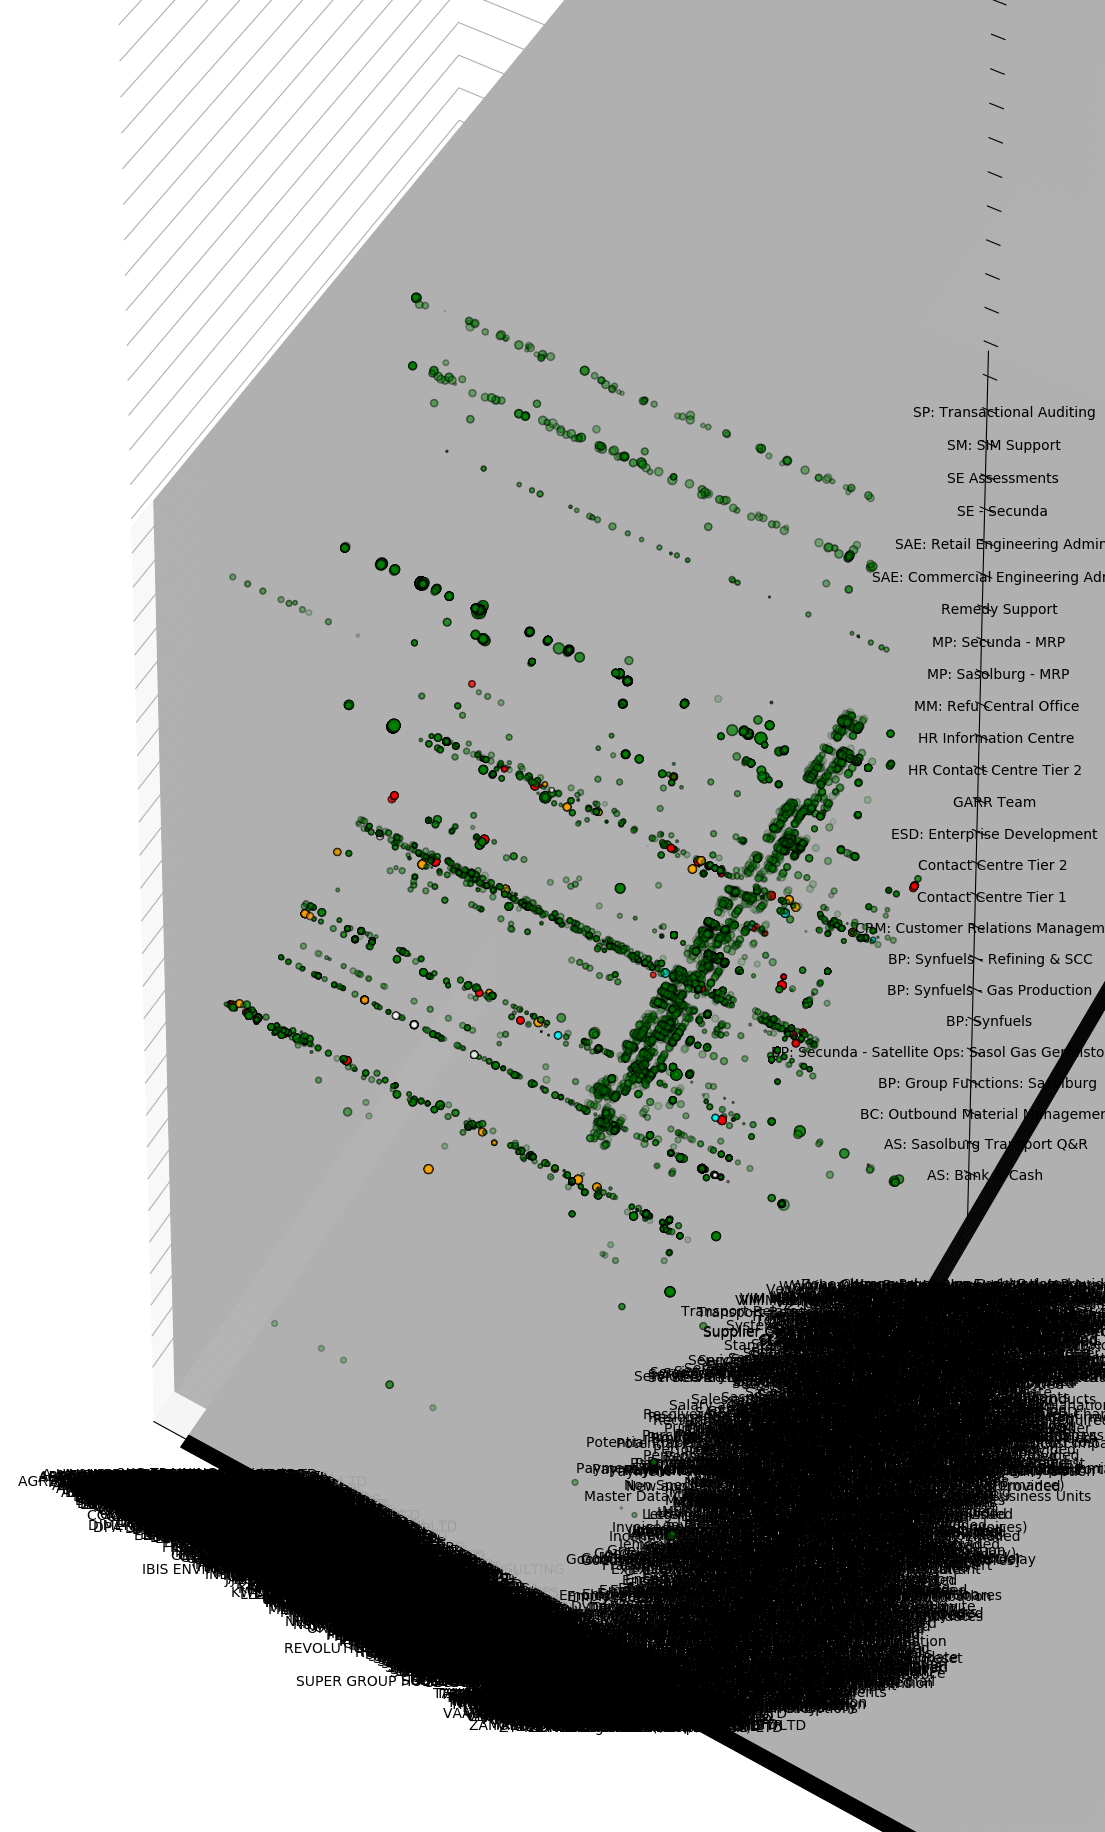

In [23]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


data = df14

fig = plt.figure(1, figsize=(14, 24), frameon=True, dpi=100)
ax = fig.add_subplot(111, projection='3d')

xs = data.loc[:,'Cust_LE_TRNS']
ys = data.loc[:,'WO_T_LE_TRNS']
zs = data.loc[:,'Suprt_Grp_LE_TRNS']
                     
                                                    
df_WOh=data.loc[:,'WO_hrs'].apply(pd.to_numeric)
area = (np.log(df_WOh))**2

colors={'':'White','Low':'Green', 'Medium':'Cyan', 'High':'Orange', 'Critical':'Red'}
priority = sorted(colors.keys()) 
priority_level = data.loc[:,'Priority']
col_lvl = [colors[l] for l in priority_level]
cmap=col_lvl

ncolors = len(priority_level)

x=data.loc[:,'Cust_LE_INV_TRNS']
y = data.loc[:,'WO_T_LE_INV_TRNS']
z = data.loc[:,'Suprt_Grp_LE_INV_TRNS']

ax.scatter(xs, ys, zs, s=area,  c=cmap, alpha=0.1,edgecolors='black')
ax.set(xticks=range(len(xs)), xticklabels=(np.unique(x)),yticks=range(len(ys)), yticklabels=(np.unique(y)),zticks=range(len(zs)), zticklabels=(np.unique(z)))

#plt.locator_params(axis='x', nbins=100)
#plt.locator_params(axis='y', nbins=100)
#plt.locator_params(axis='z', nbins=10)

ax.autoscale(enable=True, tight=True) 

plt.show()

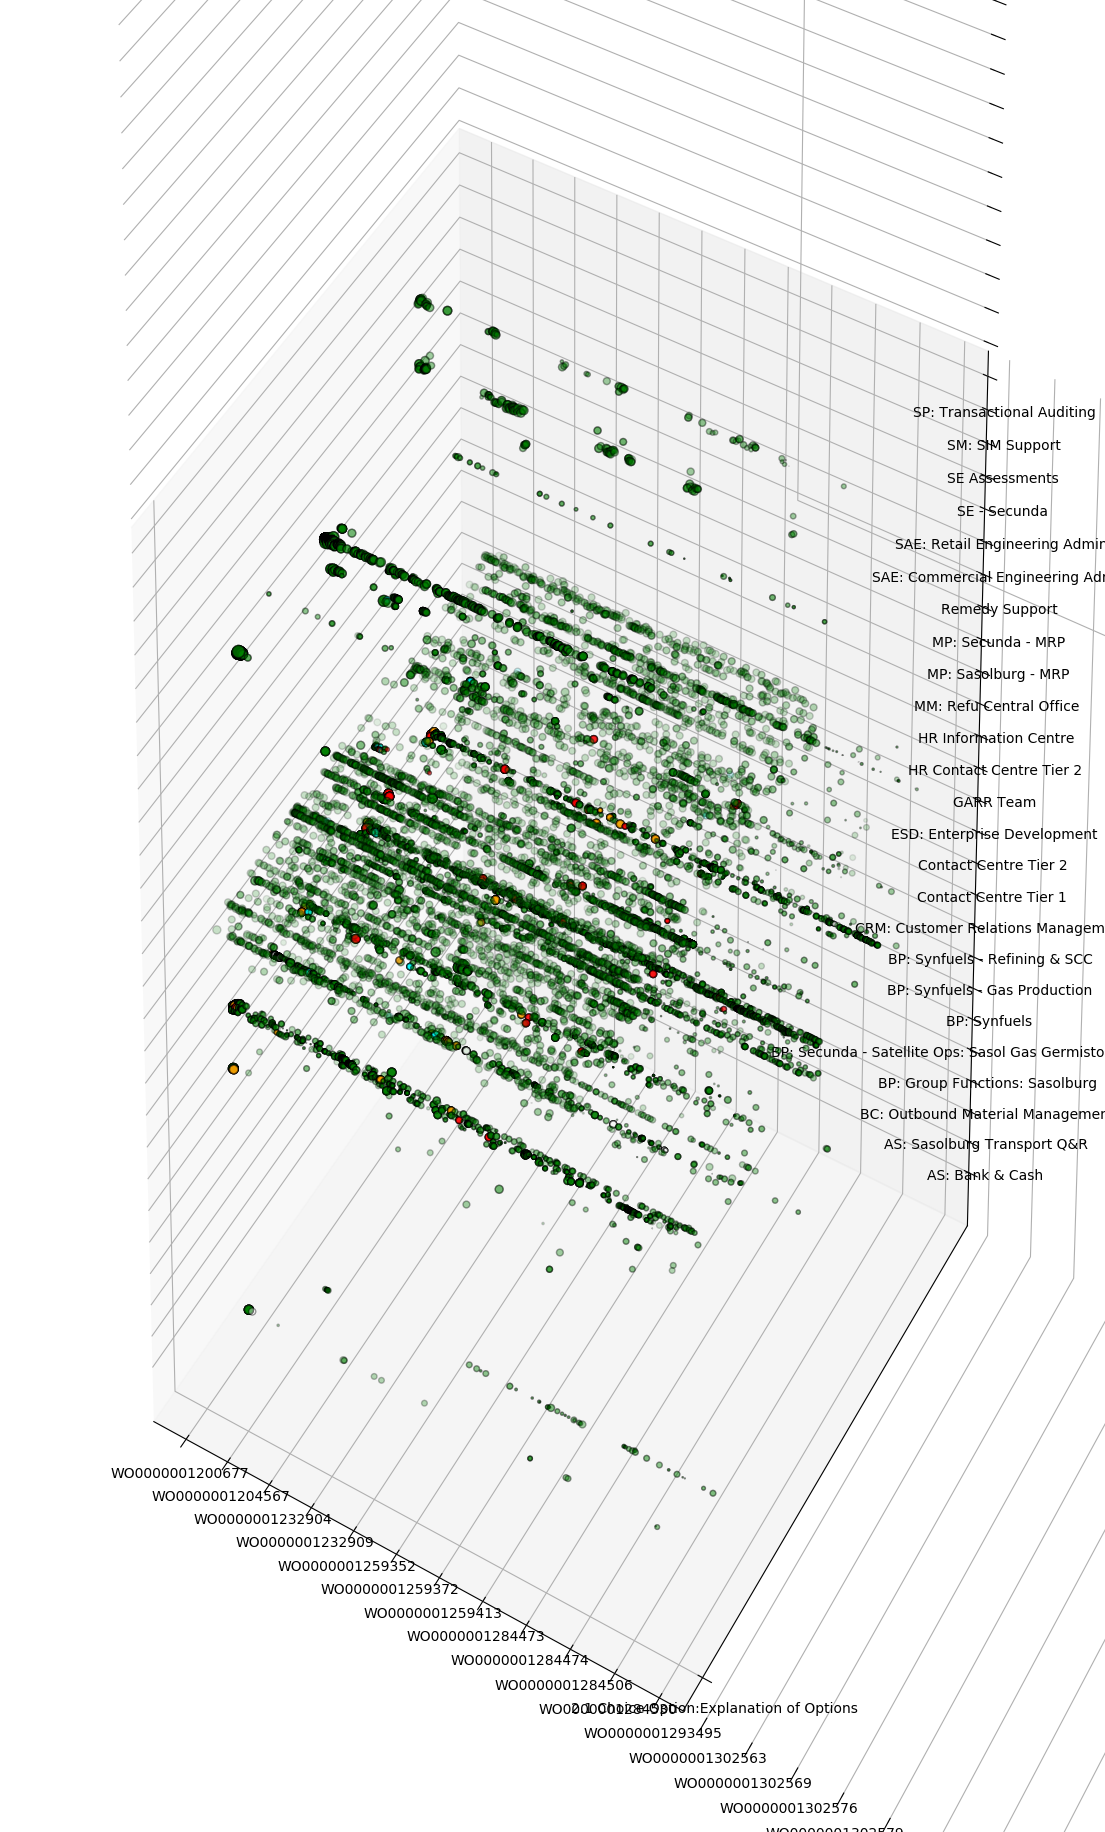

In [24]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


data = df6

fig = plt.figure(1, figsize=(14, 24), frameon=True, dpi=100)
ax = fig.add_subplot(111, projection='3d')

xs = data.loc[:,'WO_ID_LE_TRNS']
ys = data.loc[:,'WO_T_LE_TRNS']
zs = data.loc[:,'Suprt_Grp_LE_TRNS']
                     
                                                    
df_WOh=data.loc[:,'WO_hrs'].apply(pd.to_numeric)
area = (np.log(df_WOh))**2

colors={'':'White','Low':'Green', 'Medium':'Cyan', 'High':'Orange', 'Critical':'Red'}
priority = sorted(colors.keys()) 
priority_level = data.loc[:,'Priority']
col_lvl = [colors[l] for l in priority_level]
cmap=col_lvl

ncolors = len(priority_level)

x=data.loc[:,'WO_ID_LE_INV_TRNS']
y = data.loc[:,'WO_T_LE_INV_TRNS']
z = data.loc[:,'Suprt_Grp_LE_INV_TRNS']


ax.scatter(xs, ys, zs, s=area,  c=cmap, alpha=0.1,edgecolors='black')
ax.set(xticks=range(len(xs)), xticklabels=(np.unique(x)),yticks=range(len(ys)), yticklabels=(np.unique(y)),zticks=range(len(zs)), zticklabels=(np.unique(z)))
plt.locator_params(axis='x', nbins=50)
plt.locator_params(axis='y', nbins=50)
#plt.locator_params(axis='z', nbins=10)

ax.autoscale(enable=True, tight=True) 

plt.show()

ValueError: could not convert string to float: 'SAE: Retail Engineering Admin'

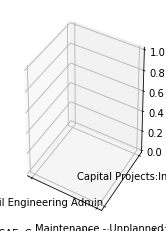

In [25]:
from mpl_toolkits.mplot3d import Axes3D
    
fig=plt.figure()

ax=fig.add_subplot(121,projection='3d')

df6['Support_Group'] = pd.Categorical(df6['Support_Group'])
df6['Work_Order_Type'] = pd.Categorical(df6['Work_Order_Type'])

#df6['Support_Group'].cat.codes
#df6['Work_Order_Type'].cat.codes

df_WOh=data.loc[:,'WO_hrs'].apply(pd.to_numeric)
area = (np.log(df_WOh))**3

zs = (np.log(df6.loc[:,'WO_hrs'].apply(pd.to_numeric)))**3

colors={'':'White','Low':'Green', 'Medium':'Cyan', 'High':'Orange', 'Critical':'Red'}
priority = sorted(colors.keys()) 
priority_level = data.loc[:,'Priority']
col_lvl = [colors[l] for l in priority_level] # color match to all levels in df

cmap=col_lvl

ncolors = len(priority_level)

ax.scatter(xs=df6['Support_Group'],ys=df6['Work_Order_Type'],zs=zs,c=cmap,s=area)

ax.autoscale(enable=True, axis='both', tight=True)

plt.suptitle('Supply Chain Contact Center', fontsize=50)

plt.xlabel('Support Group', fontsize=50)
plt.xticks(ind1,rotation='vertical', fontsize=12)

plt.ylabel('Work Order Type', fontsize=50)
plt.yticks(ind2,fontsize=12)

plt.zlabel('WO hrs', fontsize=50)
plt.zticks(ind3,fontsize=12)

plt.legend().set_visible(True)

plt.subplots_adjust(bottom=0.25)
#plt.rcParams["figure.figsize"] = (len(x),15*len(y)) #try dynamic spacing between y-labels if chart does not fit: 32773 y-points

ax.view_init(27,200)
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
    
data = df6

fig=plt.figure()

ax=fig.add_subplot(121,projection='3d')

xs = data.loc[:,'Support_Group']
u,ind1 = np.unique(xs, return_inverse=True)

ys = data.loc[:,'Work_Order_Type']
v,ind2 = np.unique(ys, return_inverse=True)

df_WOh=data.loc[:,'WO_hrs'].apply(pd.to_numeric)
area = (np.log(df_WOh))**3

zs = data.loc[:,'Work Order ID']
w,ind3 = np.unique(zs, return_inverse=True)

colors={'':'White','Low':'Green', 'Medium':'Cyan', 'High':'Orange', 'Critical':'Red'}
priority = sorted(colors.keys()) 
priority_level = data.loc[:,'Priority']
col_lvl = [colors[l] for l in priority_level] # color match to all levels in df

cmap=col_lvl

ncolors = len(priority_level)

ax.scatter(xs,ys,zs,s=area,c=cmap)

ax.autoscale(enable=True, axis='both', tight=True)

plt.suptitle('Supply Chain Contact Center', fontsize=50)

plt.xlabel('Support Group', fontsize=50)
plt.xticks(ind1,rotation='vertical', fontsize=12)

plt.ylabel('Work Order Type', fontsize=50)
plt.yticks(ind2,fontsize=12)

plt.zlabel('WO ID', fontsize=50)
plt.zticks(ind3,fontsize=12)

plt.legend().set_visible(True)

plt.subplots_adjust(bottom=0.25)
#plt.rcParams["figure.figsize"] = (len(x),15*len(y)) #try dynamic spacing between y-labels if chart does not fit: 32773 y-points

ax.view_init(27,200)
plt.show()

In [ ]:
# Chart 1

#data=df8
fig = plt.figure(1, figsize=(14, 24), frameon=False, dpi=100)
ax = fig.add_subplot(111, projection='3d')

xs = WO_ID_LE_TRNS
u,ind1 = np.unique(WO_ID, return_inverse=True)

ys = WO_T_LE_TRNS
v,ind2 = np.unique(WO_T, return_inverse=True)

zs = Suprt_Grp
w,ind3 = np.unique(Suprt_Grp , return_inverse=True)


df_WOh=df6['WO_hrs'].apply(pd.to_numeric)
area = (np.log(df_WOh))**2

colors={'':'White','Low':'Palegreen', 'Medium':'Cyan', 'High':'Violet', 'Critical':'Red'}
priority = sorted(colors.keys()) 
priority_level = df6['Priority']
col_lvl = [colors[l] for l in priority_level] # color match to all levels in df

cmap=col_lvl

ncolors = len(priority_level)

ax.scatter(xs,ys,zs,s=area, c=cmap, alpha=0.5,linewidth=0)

#x=data['Support_Group']
#y=data['Work_Order_Type']
#z=data['WO_ID']

ax.set_xlabel('$Work Order ID$', fontsize=20)
ax.set_xticks(ind1)
#ax.set_xticklabels = pd.Series(np.unique(df6.loc[:,'Work Order ID'], return_inverse=True))

ax.yaxis.set_label_text('$Work Order Type$', fontsize=20)
ax.set_yticks(ind2)
#ax.set_yticklabels = pd.Series(np.unique(df6.loc[:,'Work_Order_Type'], return_inverse=True))

ax.zaxis.set_label_text('$Support_Group$', fontsize=20)
#plt.zticks(ind3,rotation='horizontal', fontsize=12)
ax.set_zticks(ind3) 
# Chart 1

fig = plt.figure(1, figsize=(14, 24), frameon=False, dpi=100)
ax = fig.add_subplot(111, projection='3d')


xs = Suprt_Grp_LE_TRNS
u,ind1 = np.unique(df6.loc[:,'Support_Group'], return_inverse=True)

ys = WO_T_LE_TRNS
v,ind2 = np.unique(df6.loc[:,'Work_Order_Type'], return_inverse=True)

zs = WO_ID_LE_TRNS
w,ind3 = np.unique(df6.loc[:,'Work Order ID'], return_inverse=True)

df_WOh=df6['WO_hrs'].apply(pd.to_numeric)
area = (np.log(df_WOh))**2

colors={'':'White','Low':'Palegreen', 'Medium':'Cyan', 'High':'Violet', 'Critical':'Red'}
priority = sorted(colors.keys()) 
priority_level = df6['Priority']
col_lvl = [colors[l] for l in priority_level] # color match to all levels in df

cmap=col_lvl

ncolors = len(priority_level)

ax.scatter(xs=xs,ys=ys,zs=zs,s=area, c=cmap, alpha=0.5,linewidth=0)

#x=data['Support_Group']
#y=data['Work_Order_Type']
#z=data['WO_ID']

ax.set_xlabel('$Support Group$', fontsize=20)
ax.set_xticks(ind1)
#ax.set_xticklabels = pd.Series(np.unique(df6.loc[:,'Work Order ID'], return_inverse=True))

ax.yaxis.set_label_text('$Work Order Type$', fontsize=20)
ax.set_yticks(ind2)
#ax.set_yticklabels = pd.Series(np.unique(df6.loc[:,'Work_Order_Type'], return_inverse=True))

ax.zaxis.set_label_text('$Work Order ID$', fontsize=20)
ax.set_zticks(ind3) 
#plt.zticks(ind3,rotation='horizontal', fontsize=12)

plt.show()

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
import numpy as np

data = df6
fig = plt.figure(1, figsize=(14, 24), frameon=False, dpi=100)
ax = fig.add_subplot(111, projection='3d')

x = data['WO_ID_LE_TRNS']
u,ind1 = np.unique(data['Work Order ID'])#, return_inverse=True)

y = data['WO_T_LE_TRNS']
v,ind2 = np.unique(data['Work_Order_Type'])#, return_inverse=True)

z = data['Suprt_Grp_LE_TRNS']
w,ind3 = np.unique(data['Support_Group'])#, return_inverse=True)  
                     
                                                    
df_WOh=data.loc[:,'WO_hrs'].apply(pd.to_numeric)
area = (np.log(df_WOh))**2

colors={'':'White','Low':'Green', 'Medium':'Cyan', 'High':'Orange', 'Critical':'Red'}
priority = sorted(colors.keys()) 
priority_level = data.loc[:,'Priority']
col_lvl = [colors[l] for l in priority_level] # color match to all levels in df

cmap=col_lvl

ncolors = len(priority_level)

ax.scatter3D(x, y, z, s=area,  c=cmap, alpha=0.5,edgecolors='red') 

#plt.autoscale(enable=True, tight=True)

plt.suptitle('Supply Chain Contact Center', fontsize=20)

ax.set_xlabel('Work Order ID', fontsize=12)

ax.set_ylabel('Work_Order_Type', fontsize=12)

ax.set_zlabel('Support_Group', fontsize=12)
                            
def label_point(x, y, z, area, priority, ax):
    a = pd.concat({'WO_ID_LE_TRNS': x, 'WO_T_LE_TRNS': y, 'Suprt_Grp_LE_TRNS': z,'hrs': area}, axis=1)
    for i, point in a.iterrows():
        ax.text(str(point['WO_ID_LE_TRNS']), str(point['WO_T_LE_TRNS']),str(point['Suprt_Grp_LE_TRNS']), point['hrs'])
        label_point(data.ind1, data.ind2, data.ind3, data.area,ax)

plt.rcParams["figure.figsize"] = (((len(ind1))/500),((len(ind2))/100))
fig.tight_layout()

plt.show()

In [ ]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


data = df6

fig = plt.figure(1, figsize=(14, 24), frameon=True, dpi=100)
ax = fig.add_subplot(111, projection='3d')

xs = data.loc[:,'Suprt_Grp_LE_TRNS']
ys = data.loc[:,'WO_T_LE_TRNS']
zs = data.loc[:,'WO_ID_LE_TRNS']
                     
                                                    
df_WOh=data.loc[:,'WO_hrs'].apply(pd.to_numeric)
area = (np.log(df_WOh))**2

colors={'':'White','Low':'Green', 'Medium':'Cyan', 'High':'Orange', 'Critical':'Red'}
priority = sorted(colors.keys()) 
priority_level = data.loc[:,'Priority']
col_lvl = [colors[l] for l in priority_level]
cmap=col_lvl

ncolors = len(priority_level)

x = data.loc[:,'Suprt_Grp_LE_INV_TRNS']
y = data.loc[:,'WO_T_LE_INV_TRNS']
z = data.loc[:,'WO_ID_LE_INV_TRNS']


ax.scatter(xs, ys, zs, s=area,  c=cmap, alpha=0.1,edgecolors='black')
ax.set(xticks=range(len(xs)), xticklabels=(np.unique(x)),yticks=range(len(ys)), yticklabels=(np.unique(y)),zticks=range(len(zs)), zticklabels=(np.unique(z)))
#plt.locator_params(axis='x', nbins=25)
#plt.locator_params(axis='y', nbins=50)
#plt.locator_params(axis='z', nbins=50)

mpl.pyplot.autoscale(enable=True, axis='both', tight=True)
#ax.autoscale(enable=True, tight=True) 
plt.subplots_adjust(bottom=0.25)

plt.show()

In [ ]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


data = df6

fig = plt.figure(1, figsize=(14, 24), frameon=False, dpi=100)
ax = fig.add_subplot(111, projection='3d')

xs = data.loc[:,'WO_ID_LE_TRNS']
ys = data.loc[:,'WO_T_LE_TRNS']
zs = data.loc[:,'Suprt_Grp_LE_TRNS']
                     
                                                    
df_WOh=data.loc[:,'WO_hrs'].apply(pd.to_numeric)
area = (np.log(df_WOh))**2

colors={'':'White','Low':'Green', 'Medium':'Cyan', 'High':'Orange', 'Critical':'Red'}
priority = sorted(colors.keys()) 
priority_level = data.loc[:,'Priority']
col_lvl = [colors[l] for l in priority_level] # color match to all levels in df

cmap=col_lvl

ncolors = len(priority_level)

ax.scatter3D(xs, ys, zs, s=area,  c=cmap, alpha=0.5,edgecolors=None)   #area = s

x = data.loc[:,'WO_ID_LE_INV_TRNS']
y = data.loc[:,'WO_T_LE_INV_TRNS']
z = data.loc[:,'Suprt_Grp_LE_INV_TRNS']

ax.autoscale(enable=True, tight=True) # same as fig.tight_layout()
#ax.suptitle('Supply Chain Contact Center', fontsize=20)

ax.set_xlabel('Work Order ID', fontsize=12)
ax.set_xticklabels = pd.Series(np.unique(x, return_inverse=True))
#ax.set_xticklabels = (np.unique(WO_ID_LE_INV_TRNS))

ax.yaxis.set_label_text('Work_Order_Type', fontsize=12)
ax.set_yticklabels = pd.Series(np.unique(y, return_inverse=True))

ax.zaxis.set_label_text('Support_Group', fontsize=12)              
ax.set_zticklabels = pd.Series(np.unique(z, return_inverse=True))
                            

plt.show()